# CRIME DATA ANALYSIS - EDA

## DATA PRE - PROCESSING

In [2]:
import pandas as pd
data= pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df = pd.DataFrame(data)

In [3]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879106 entries, 0 to 879105
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           879106 non-null  int64  
 1   Date Rptd       879106 non-null  object 
 2   DATE OCC        879106 non-null  object 
 3   TIME OCC        879106 non-null  int64  
 4   AREA            879106 non-null  int64  
 5   AREA NAME       879106 non-null  object 
 6   Rpt Dist No     879106 non-null  int64  
 7   Part 1-2        879106 non-null  int64  
 8   Crm Cd          879106 non-null  int64  
 9   Crm Cd Desc     879106 non-null  object 
 10  Mocodes         756810 non-null  object 
 11  Vict Age        879106 non-null  int64  
 12  Vict Sex        762804 non-null  object 
 13  Vict Descent    762796 non-null  object 
 14  Premis Cd       879096 non-null  float64
 15  Premis Desc     878571 non-null  object 
 16  Weapon Used Cd  305086 non-null  float64
 17  Weapon Des

In [5]:
# Check for missing data
df.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           122296
Vict Age               0
Vict Sex          116302
Vict Descent      116310
Premis Cd             10
Premis Desc          535
Weapon Used Cd    574020
Weapon Desc       574020
Status                 0
Status Desc            0
Crm Cd 1              11
Crm Cd 2          814910
Crm Cd 3          876939
Crm Cd 4          879044
LOCATION               0
Cross Street      740005
LAT                    0
LON                    0
dtype: int64

In [6]:
df.fillna(0, inplace=True)
df.isna().sum()

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      0
LAT               0
LON               0
dtype: int64

In [7]:
#converting date occ to yean and month for simplified analysis
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

df['Year'] = df['DATE OCC'].dt.year
df['Month'] = df['DATE OCC'].dt.month
df['Year'].head()

0    2020
1    2020
2    2020
3    2020
4    2020
Name: Year, dtype: int64

## OVERALL CRIME TRENDS

### What is the overall trend of crimes over the year?

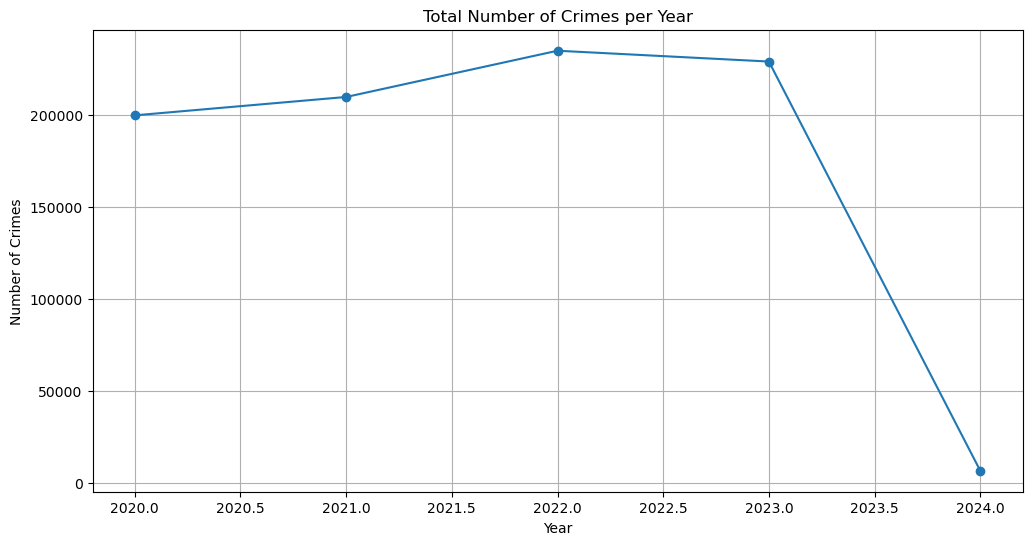

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in the 'Year' column and sort by the index (years)
crime_counts = df['Year'].value_counts().sort_index()

# Create a new figure with a specific size
plt.figure(figsize=(12, 6))

# Plotting the total number of crimes per year using markers and lines
plt.plot(crime_counts.index, crime_counts.values, marker='o', linestyle='-')
plt.title('Total Number of Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

# Add grid lines for better visualization
plt.grid(True)
plt.show()


### What are the seasonal patterns?

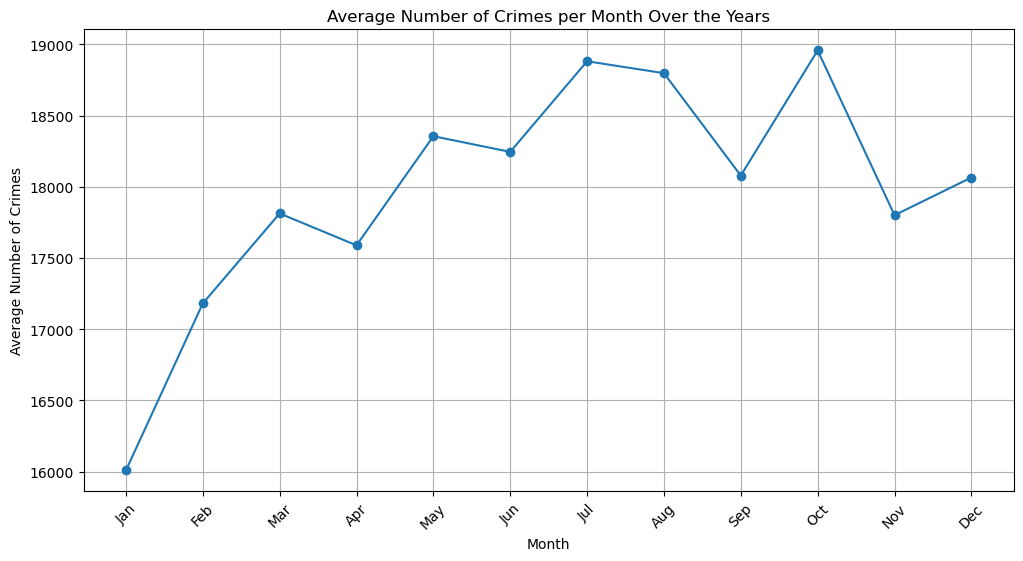

In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
# Grouping the DataFrame 'df' by 'Year' and 'Month', then counting the occurrences of 'Crm Cd' for each group
monthly_avg_crimes = df.groupby(['Year', 'Month'])['Crm Cd'].count().groupby('Month').mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(12, 6))
# Plotting the average number of crimes per month over the years with markers and lines
monthly_avg_crimes.plot(marker='o', linestyle='-')
plt.title('Average Number of Crimes per Month Over the Years')
plt.xlabel('Month')
plt.ylabel('Average Number of Crimes')
# Set custom ticks for the x-axis based on month_names, rotating them for better readability
plt.xticks(range(1, 13), month_names, rotation=45)
plt.grid(True)
plt.show()

In [10]:
# Count the occurrences of each crime type
crime_counts = df['Crm Cd Desc'].value_counts()

print("Occurrences of each crime type:")
crime_counts

Occurrences of each crime type:


VEHICLE - STOLEN                            94399
BATTERY - SIMPLE ASSAULT                    69945
THEFT OF IDENTITY                           54681
BURGLARY FROM VEHICLE                       54245
BURGLARY                                    53762
                                            ...  
THEFT, COIN MACHINE - ATTEMPT                   5
FIREARMS RESTRAINING ORDER (FIREARMS RO)        4
FAILURE TO DISPERSE                             3
DISHONEST EMPLOYEE ATTEMPTED THEFT              2
BOAT - ATTEMPTED STOLEN                         1
Name: Crm Cd Desc, Length: 139, dtype: int64

In [11]:
# Count the occurrences of each crime type
crime_counts = df['Crm Cd Desc'].value_counts()

# Identify the crime type with the highest frequency
most_common_crime = crime_counts.idxmax()
highest_frequency = crime_counts.max()

print(f"The most common crime type is '{most_common_crime}' with {highest_frequency} occurrences.")

The most common crime type is 'VEHICLE - STOLEN' with 94399 occurrences.


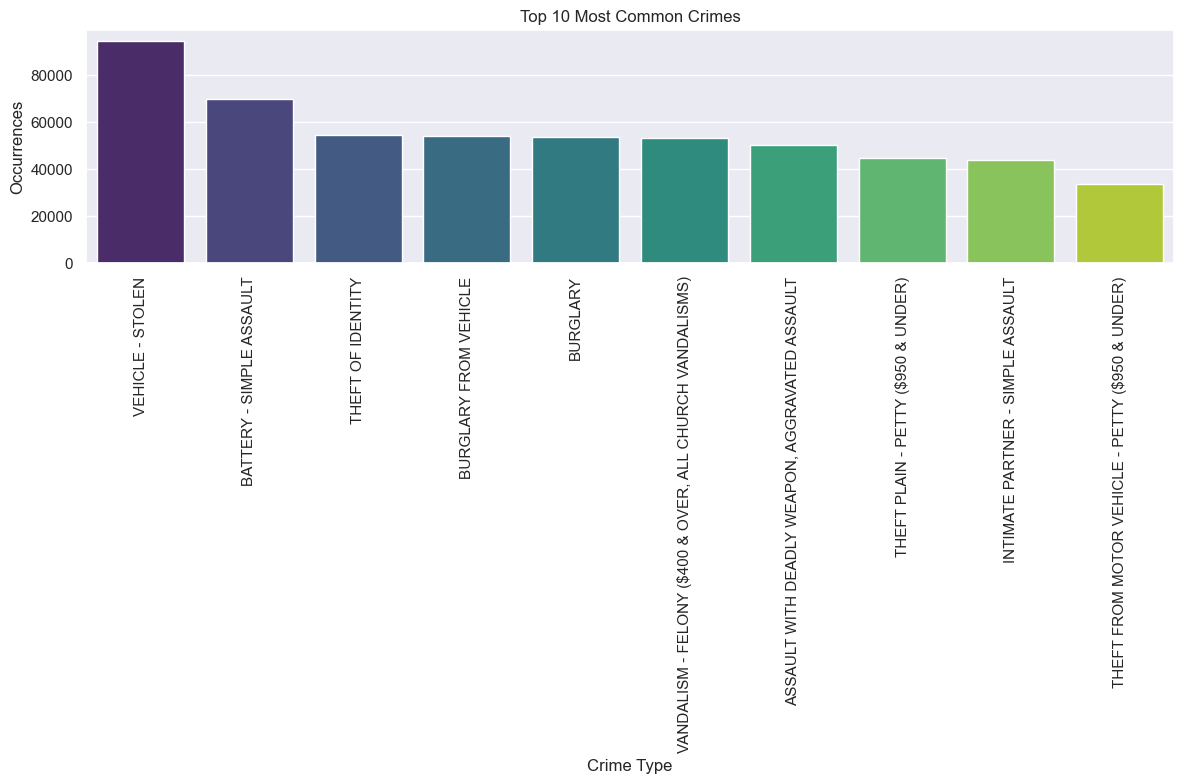

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each crime type
crime_counts = df['Crm Cd Desc'].value_counts()

# Filter out the top 10 most common crimes
top_10_crimes = crime_counts.head(10)

# Set Seaborn style parameters to increase the size of bars
sns.set(rc={'figure.figsize':(12, 8)})

# Plotting the top 10 most common crimes using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_crimes.index, y=top_10_crimes.values, palette='viridis')
plt.xlabel('Crime Type')
plt.ylabel('Occurrences')
plt.title('Top 10 Most Common Crimes')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

### what are the regional differences in crime?

In [13]:
# Group the data by 'AREA NAME' and calculate the mean crime rate for each region
crime_rates_by_region = df.groupby('AREA NAME')['Crm Cd Desc'].count()

# Display descriptive statistics for crime rates by region
print("Descriptive Statistics for Crime Rates by Region:")
print(crime_rates_by_region.describe())


Descriptive Statistics for Crime Rates by Region:
count       21.000000
mean     41862.190476
std       7555.294585
min      29165.000000
25%      36246.000000
50%      41398.000000
75%      44507.000000
max      59748.000000
Name: Crm Cd Desc, dtype: float64


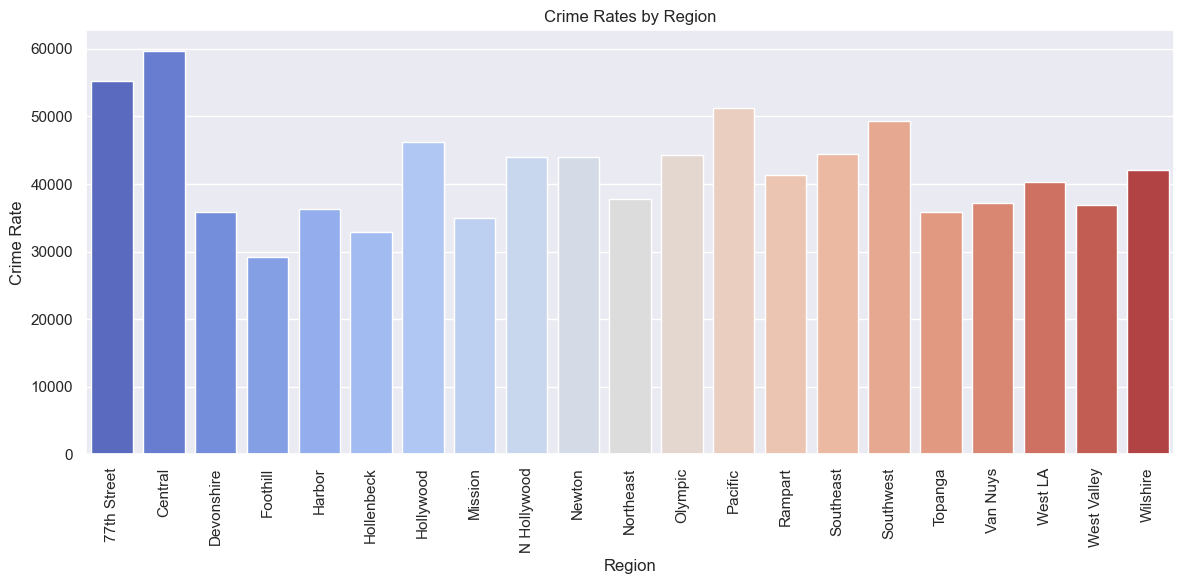

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting crime rates by region using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=crime_rates_by_region.index, y=crime_rates_by_region.values, palette='coolwarm')
plt.xlabel('Region')
plt.ylabel('Crime Rate')
plt.title('Crime Rates by Region')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [15]:
# Calculate the crime rate count for each region
crime_rate_by_region = df['AREA NAME'].value_counts()

# Display the crime rate count for each region
print("Crime Rate Count for Each Region:")
print(crime_rate_by_region)


Crime Rate Count for Each Region:
Central        59748
77th Street    55193
Pacific        51305
Southwest      49336
Hollywood      46211
Southeast      44507
Olympic        44256
Newton         43984
N Hollywood    43950
Wilshire       42024
Rampart        41398
West LA        40288
Northeast      37832
Van Nuys       37138
West Valley    36955
Harbor         36246
Topanga        35904
Devonshire     35806
Mission        35020
Hollenbeck     32840
Foothill       29165
Name: AREA NAME, dtype: int64


## CORRELATION OF CRIMES WITH ECONOMIC FACTORS

In [16]:
import pandas as pd

# Data for CPI
cpi_data = {
    "Year": [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "Jan": [0.2, 0.2, -0.6, 0.0, 0.4, 0.4, 0.0, 0.2, 0.2, 0.6, 0.5],
    "Feb": [0.5, 0.1, 0.3, -0.1, 0.2, 0.3, 0.2, 0.1, 0.4, 0.7, 0.4],
    "Mar": [-0.3, 0.2, 0.3, 0.3, 0.0, 0.0, 0.3, -0.4, 0.5, 1.0, 0.1],
    "Apr": [-0.2, 0.2, 0.1, 0.4, 0.1, 0.3, 0.4, -0.8, 0.7, 0.4, 0.4],
    "May": [0.0, 0.2, 0.3, 0.2, -0.1, 0.2, 0.0, -0.1, 0.7, 0.9, 0.1],
    "Jun": [0.2, 0.1, 0.3, 0.3, 0.1, 0.1, -0.1, 0.4, 0.8, 1.2, 0.2],
    "Jul": [0.2, 0.1, 0.2, -0.1, 0.0, 0.1, 0.2, 0.5, 0.4, 0.0, 0.2],
    "Aug": [0.2, 0.0, 0.0, 0.2, 0.4, 0.2, 0.1, 0.4, 0.4, 0.2, 0.6],
    "Sep": [0.0, 0.0, -0.2, 0.3, 0.5, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4],
    "Oct": [0.1, 0.0, 0.1, 0.2, 0.1, -0.1, 0.3, 0.1, 0.4, 0.5, None],
    "Nov": [0.2, -0.2, 0.1, 0.1, 0.3, 0.1, 0.2, 0.2, 0.2, 0.2, None],
    "Dec": [0.3, -0.3, -0.1, 0.3, 0.2, 0.1, 0.3, 0.5, 0.1, 0.8, None]
}

# Create DataFrame
cpi_df = pd.DataFrame(cpi_data)

# Mapping for month abbreviations to numbers
month_mapping = {
    'Jan': '01',
    'Feb': '02',
    'Mar': '03',
    'Apr': '04',
    'May': '05',
    'Jun': '06',
    'Jul': '07',
    'Aug': '08',
    'Sep': '09',
    'Oct': '10',
    'Nov': '11',
    'Dec': '12'
}

# Reshape the DataFrame to the desired format
formatted_cpi_df = cpi_df.melt(id_vars=["Year"], var_name="Month", value_name="CPI")

# Corrected line for creating 'Date' column
formatted_cpi_df['Date'] = pd.to_datetime(formatted_cpi_df['Year'].astype(str) + '-' + formatted_cpi_df['Month'].map(month_mapping) + '-01')

# Set 'Date' as the index and select the columns you want
formatted_cpi_df = formatted_cpi_df.set_index('Date')[['CPI']]

# Print the formatted DataFrame
print(formatted_cpi_df.tail())


            CPI
Date           
2019-12-01  0.3
2020-12-01  0.5
2021-12-01  0.1
2022-12-01  0.8
2023-12-01  NaN


In [17]:
import pandas as pd

# Labor Force Statistics data
lf_stats_data = {
    "Year": [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "Jan": [8.0, 6.6, 5.7, 4.8, 4.7, 4.0, 4.0, 3.5, 6.3, 4.0, 3.4],
    "Feb": [7.7, 6.7, 5.5, 4.9, 4.6, 4.1, 3.8, 3.5, 6.2, 3.8, 3.6],
    "Mar": [7.5, 6.7, 5.4, 5.0, 4.4, 4.0, 3.8, 4.4, 6.1, 3.6, 3.5],
    "Apr": [7.6, 6.2, 5.4, 5.1, 4.4, 4.0, 3.6, 14.7, 6.1, 3.6, 3.4],
    "May": [7.5, 6.3, 5.6, 4.8, 4.4, 3.8, 3.7, 13.2, 5.8, 3.6, 3.7],
    "Jun": [7.5, 6.1, 5.3, 4.9, 4.3, 4.0, 3.6, 11.0, 5.9, 3.6, 3.6],
    "Jul": [7.3, 6.2, 5.2, 4.8, 4.3, 3.8, 3.7, 10.2, 5.4, 3.5, 3.5],
    "Aug": [7.2, 6.1, 5.1, 4.9, 4.4, 3.8, 3.7, 8.4, 5.2, 3.7, 3.8],
    "Sep": [7.2, 5.9, 5.0, 5.0, 4.3, 3.7, 3.5, 7.9, 4.8, 3.5, 3.8],
    "Oct": [7.2, 5.7, 5.0, 4.9, 4.2, 3.8, 3.6, 6.9, 4.5, 3.7, None],
    "Nov": [6.9, 5.8, 5.1, 4.7, 4.2, 3.8, 3.6, 6.7, 4.2, 3.6, None],
    "Dec": [6.7, 5.6, 5.0, 4.7, 4.1, 3.9, 3.6, 6.7, 3.9, 3.5, None],
}

# Create a DataFrame from the updated Labor Force Statistics data
lf_stats_df = pd.DataFrame(lf_stats_data)

# Mapping for month abbreviations to numbers
month_mapping = {
    'Jan': '01',
    'Feb': '02',
    'Mar': '03',
    'Apr': '04',
    'May': '05',
    'Jun': '06',
    'Jul': '07',
    'Aug': '08',
    'Sep': '09',
    'Oct': '10',
    'Nov': '11',
    'Dec': '12'
}

# Reshape the DataFrame to the desired format
formatted_lf_stats_df = lf_stats_df.melt(id_vars=["Year"], var_name="Month", value_name="Rate")

# Corrected line for creating 'Date' column
formatted_lf_stats_df['Date'] = pd.to_datetime(formatted_lf_stats_df['Year'].astype(str) + '-' + formatted_lf_stats_df['Month'].map(month_mapping) + '-01')

# Set 'Date' as the index and select the columns you want
formatted_lf_stats_df = formatted_lf_stats_df.set_index('Date')[['Rate']]

# Print the formatted DataFrame
print(formatted_lf_stats_df)
print(formatted_lf_stats_df.columns)


            Rate
Date            
2013-01-01   8.0
2014-01-01   6.6
2015-01-01   5.7
2016-01-01   4.8
2017-01-01   4.7
...          ...
2019-12-01   3.6
2020-12-01   6.7
2021-12-01   3.9
2022-12-01   3.5
2023-12-01   NaN

[132 rows x 1 columns]
Index(['Rate'], dtype='object')


In [26]:
formatted_lf_stats_df = formatted_lf_stats_df.rename(columns={"Date": "Date", "Rate": "Unemployment Rate"})

# Print the formatted DataFrame with renamed columns
formatted_lf_stats_df

,Unemployment Rate,Year,Month
Date,,,
2020-01-01,3.5,2020,1
2021-01-01,6.3,2021,1
2022-01-01,4.0,2022,1
2023-01-01,3.4,2023,1
2020-02-01,3.5,2020,2
2021-02-01,6.2,2021,2
2022-02-01,3.8,2022,2
2023-02-01,3.6,2023,2
2020-03-01,4.4,2020,3


In [27]:
import pandas as pd

# Load and preprocess the crime dataset
crime_df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

# Select relevant columns
crime_df = crime_df[['DATE OCC', 'Crm Cd Desc']]

# Convert 'DATE OCC' to datetime format
crime_df['DATE OCC'] = pd.to_datetime(crime_df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the year and month
crime_df['Year'] = crime_df['DATE OCC'].dt.year
crime_df['Month'] = crime_df['DATE OCC'].dt.month

# Group by 'Year', 'Month', and 'Crm Cd Desc', and count the number of crimes
crime_per_month = crime_df.groupby(['Year', 'Month', 'Crm Cd Desc']).size().reset_index(name='Number of Crimes')

# Display the resulting DataFrame
print(crime_per_month)


      Year  Month                                        Crm Cd Desc  \
0     2020      1                                              ARSON   
1     2020      1       ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER   
2     2020      1     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT   
3     2020      1                                  ATTEMPTED ROBBERY   
4     2020      1                           BATTERY - SIMPLE ASSAULT   
...    ...    ...                                                ...   
5226  2024      1                                   VEHICLE - STOLEN   
5227  2024      1  VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...   
5228  2024      1                           VIOLATION OF COURT ORDER   
5229  2024      1                     VIOLATION OF RESTRAINING ORDER   
5230  2024      1           VIOLATION OF TEMPORARY RESTRAINING ORDER   

      Number of Crimes  
0                   45  
1                    1  
2                  810  
3                  105  
4         

In [28]:
distinct_crimes = crime_per_month['Crm Cd Desc'].unique()

# Print the list of distinct crimes
for crime in distinct_crimes:
    print(crime)

# Print the total number of distinct crimes
print("Total number of distinct crimes:", len(distinct_crimes))


ARSON
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
ATTEMPTED ROBBERY
BATTERY - SIMPLE ASSAULT
BATTERY POLICE (SIMPLE)
BATTERY WITH SEXUAL CONTACT
BIKE - STOLEN
BOAT - STOLEN
BOMB SCARE
BRANDISH WEAPON
BRIBERY
BUNCO, ATTEMPT
BUNCO, GRAND THEFT
BUNCO, PETTY THEFT
BURGLARY
BURGLARY FROM VEHICLE
BURGLARY FROM VEHICLE, ATTEMPTED
BURGLARY, ATTEMPTED
CHILD ABANDONMENT
CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT
CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT
CHILD ANNOYING (17YRS & UNDER)
CHILD NEGLECT (SEE 300 W.I.C.)
CHILD PORNOGRAPHY
CHILD STEALING
CONSPIRACY
CONTEMPT OF COURT
CONTRIBUTING
COUNTERFEIT
CREDIT CARDS, FRAUD USE ($950 & UNDER
CREDIT CARDS, FRAUD USE ($950.01 & OVER)
CRIMINAL HOMICIDE
CRIMINAL THREATS - NO WEAPON DISPLAYED
CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)
DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER
DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01
DISCHARGE FIREARMS/SHOTS FIRED
DISHONEST EMPLOYEE - GRAND

In [29]:
# List of crimes related to monetary gains
monetary_gain_crimes = [
    "BUNCO, ATTEMPT",
    "BUNCO, GRAND THEFT",
    "BUNCO, PETTY THEFT",
    "CREDIT CARDS, FRAUD USE ($950 & UNDER)",
    "CREDIT CARDS, FRAUD USE ($950.01 & OVER)",
    "DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER",
    "DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01",
    "DOCUMENT FORGERY / STOLEN FELONY",
    "DOCUMENT WORTHLESS ($200.01 & OVER)",
    "DRIVING WITHOUT OWNER CONSENT (DWOC)",
    "DRUGS, TO A MINOR",
    "EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",
    "EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)",
    "EXTORTION",
    "GRAND THEFT / INSURANCE FRAUD",
    "THEFT, COIN MACHINE - PETTY ($950 & UNDER)",
    "THEFT, COIN MACHINE - GRAND ($950.01 & OVER)",
    "THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)",
    "THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)",
    "THEFT FROM PERSON - ATTEMPT",
    "THEFT OF IDENTITY",
    "THEFT PLAIN - ATTEMPT",
    "THEFT PLAIN - PETTY ($950 & UNDER)",
    "THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD",
    "TILL TAP - PETTY ($950 & UNDER)",
    "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",
    "VANDALISM - MISDEMEANOR ($399 OR UNDER)",
    "WEAPONS POSSESSION/BOMBING"
]

# Create a new DataFrame with only the rows containing monetary gain crimes
monetary_gain_df = crime_per_month[crime_per_month['Crm Cd Desc'].isin(monetary_gain_crimes)]

# Display the new DataFrame
print(monetary_gain_df)


      Year  Month                                        Crm Cd Desc  \
12    2020      1                                     BUNCO, ATTEMPT   
13    2020      1                                 BUNCO, GRAND THEFT   
14    2020      1                                 BUNCO, PETTY THEFT   
31    2020      1           CREDIT CARDS, FRAUD USE ($950.01 & OVER)   
35    2020      1  DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 &...   
...    ...    ...                                                ...   
5213  2024      1                                  THEFT OF IDENTITY   
5214  2024      1                              THEFT PLAIN - ATTEMPT   
5215  2024      1                 THEFT PLAIN - PETTY ($950 & UNDER)   
5217  2024      1  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...   
5223  2024      1  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...   

      Number of Crimes  
12                   6  
13                 157  
14                  91  
31                   1  
35        

In [30]:
# Add 'Year' and 'Month' columns to formatted_lf_stats_df
formatted_lf_stats_df['Year'] = formatted_lf_stats_df.index.year
formatted_lf_stats_df['Month'] = formatted_lf_stats_df.index.month

# Add 'Year' and 'Month' columns to formatted_cpi_df
formatted_cpi_df['Year'] = formatted_cpi_df.index.year
formatted_cpi_df['Month'] = formatted_cpi_df.index.month

# Filter data for the years 2020 to 2023
formatted_lf_stats_df = formatted_lf_stats_df[(formatted_lf_stats_df['Year'] >= 2020) & (formatted_lf_stats_df['Year'] <= 2023)]
formatted_cpi_df = formatted_cpi_df[(formatted_cpi_df['Year'] >= 2020) & (formatted_cpi_df['Year'] <= 2023)]

# Display the filtered DataFrames
print(formatted_lf_stats_df.head())
print(formatted_cpi_df.head())

            Unemployment Rate  Year  Month
Date                                      
2020-01-01                3.5  2020      1
2021-01-01                6.3  2021      1
2022-01-01                4.0  2022      1
2023-01-01                3.4  2023      1
2020-02-01                3.5  2020      2
            Consumer Price Index  Year  Month
Date                                         
2020-01-01                   0.2  2020      1
2021-01-01                   0.2  2021      1
2022-01-01                   0.6  2022      1
2023-01-01                   0.5  2023      1
2020-02-01                   0.1  2020      2


In [31]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Rename columns for clarity
formatted_cpi_df.rename(columns={'CPI': 'Consumer Price Index'}, inplace=True)
formatted_lf_stats_df.rename(columns={'Unemployment Rate': 'Unemployment Rate'}, inplace=True)
monetary_gain_df.rename(columns={'Number of Crimes': 'Crime Rate'}, inplace=True)

# Merge dataframes
merged_data = pd.merge(monetary_gain_df, formatted_cpi_df, on=['Year', 'Month'])
merged_data = pd.merge(merged_data, formatted_lf_stats_df, on=['Year', 'Month'])

# Display the merged DataFrame
print(merged_data.head())


   Year  Month                                        Crm Cd Desc  Crime Rate  \
0  2020      1                                     BUNCO, ATTEMPT           6   
1  2020      1                                 BUNCO, GRAND THEFT         157   
2  2020      1                                 BUNCO, PETTY THEFT          91   
3  2020      1           CREDIT CARDS, FRAUD USE ($950.01 & OVER)           1   
4  2020      1  DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 &...          12   

   Consumer Price Index  Unemployment Rate  
0                   0.2                3.5  
1                   0.2                3.5  
2                   0.2                3.5  
3                   0.2                3.5  
4                   0.2                3.5  


/var/folders/g3/_p0h6_g550d4ntz4bzq_cg7m0000gn/T/ipykernel_16566/266444174.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monetary_gain_df.rename(columns={'Number of Crimes': 'Crime Rate'}, inplace=True)


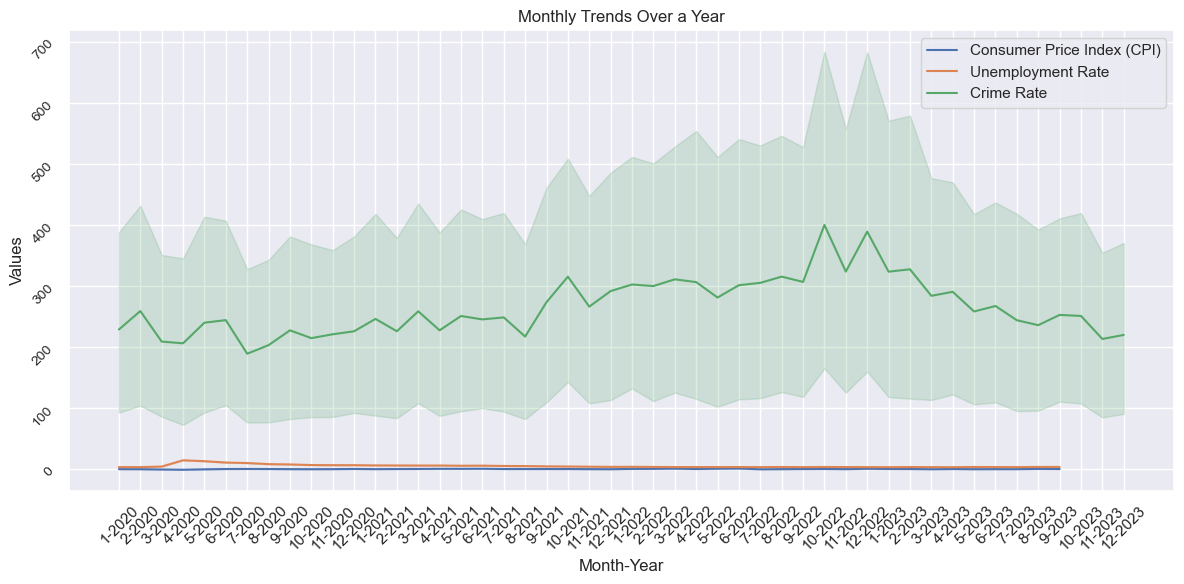

In [32]:
# Create a new column 'Month-Year' by combining 'Month' and 'Year' as strings
merged_data['Month-Year'] = merged_data['Month'].astype(str) + '-' + merged_data['Year'].astype(str)

# Create a line plot for each variable
fig, ax = plt.subplots(figsize=(12, 6))

# Line plot for CPI
sns.lineplot(x='Month-Year', y='Consumer Price Index', data=merged_data, label='Consumer Price Index (CPI)')

# Line plot for Unemployment Rate
sns.lineplot(x='Month-Year', y='Unemployment Rate', data=merged_data, label='Unemployment Rate')

# Line plot for Crime Rate
sns.lineplot(x='Month-Year', y='Crime Rate', data=merged_data, label='Crime Rate')

# Set plot title and labels
plt.title('Monthly Trends Over a Year')
plt.xlabel('Month-Year')
plt.ylabel('Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Increase y-axis ticks for more clarity
plt.yticks(rotation=45, fontsize=10)

# Show legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


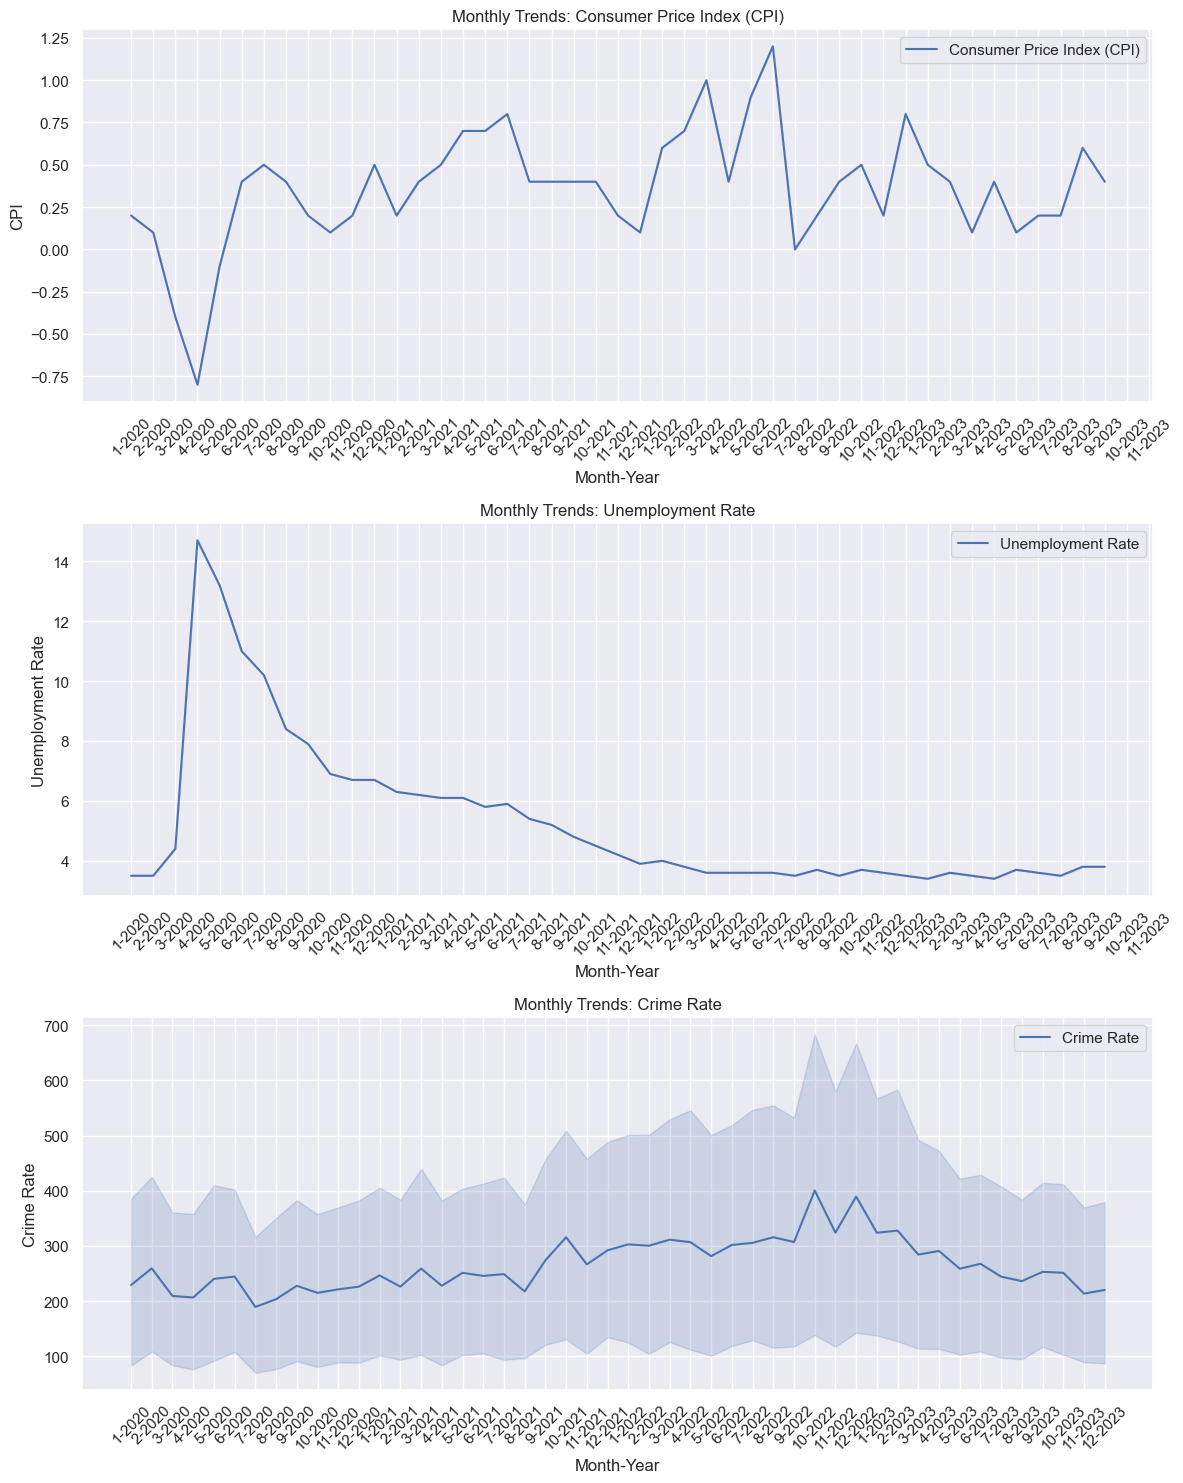

In [36]:
# Create a new column 'Month-Year' by combining 'Month' and 'Year' as strings
merged_data['Month-Year'] = merged_data['Month'].astype(str) + '-' + merged_data['Year'].astype(str)

# Create separate line plots for each variable
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))

# Line plot for CPI
sns.lineplot(x='Month-Year', y='Consumer Price Index', data=merged_data, label='Consumer Price Index (CPI)', ax=ax1)
ax1.set_title('Monthly Trends: Consumer Price Index (CPI)')
ax1.set_xlabel('Month-Year')
ax1.set_ylabel('CPI')
ax1.tick_params(axis='x', rotation=45)
ax1.legend()

# Line plot for Unemployment Rate
sns.lineplot(x='Month-Year', y='Unemployment Rate', data=merged_data, label='Unemployment Rate', ax=ax2)
ax2.set_title('Monthly Trends: Unemployment Rate')
ax2.set_xlabel('Month-Year')
ax2.set_ylabel('Unemployment Rate')
ax2.tick_params(axis='x', rotation=45)
ax2.legend()

# Line plot for Crime Rate
sns.lineplot(x='Month-Year', y='Crime Rate', data=merged_data, label='Crime Rate', ax=ax3)
ax3.set_title('Monthly Trends: Crime Rate')
ax3.set_xlabel('Month-Year')
ax3.set_ylabel('Crime Rate')
ax3.tick_params(axis='x', rotation=45)
ax3.legend()

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

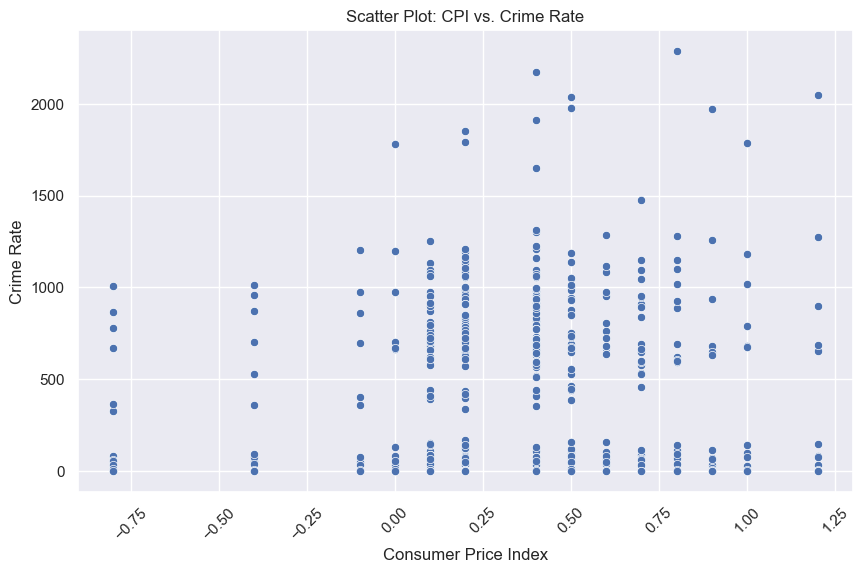

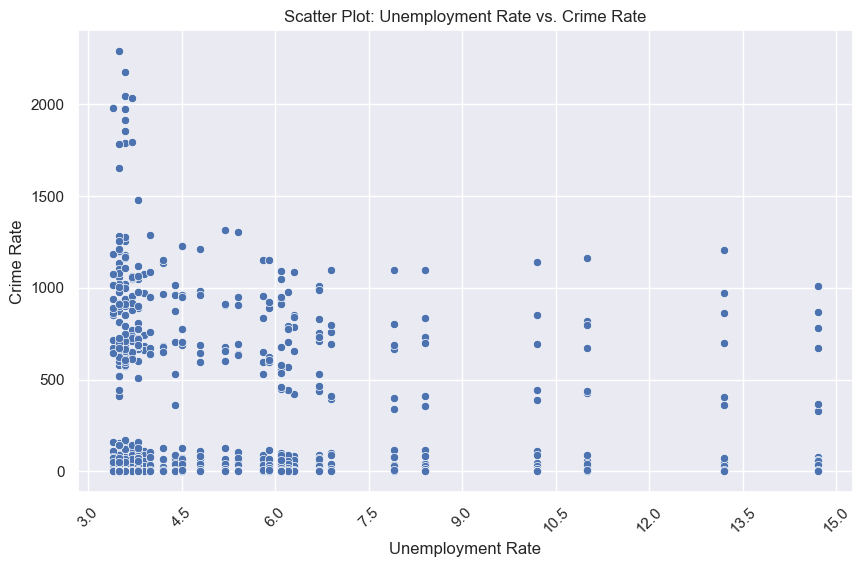

In [33]:
# Scatter plot for CPI vs. Crime Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Consumer Price Index', y='Crime Rate', data=merged_data)
plt.title('Scatter Plot: CPI vs. Crime Rate')
plt.xlabel('Consumer Price Index')
plt.ylabel('Crime Rate')

# Format x-axis labels to include Year and Month
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(prune='both'))

plt.show()

# Scatter plot for Unemployment Rate vs. Crime Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment Rate', y='Crime Rate', data=merged_data)  # Fix the variable name here
plt.title('Scatter Plot: Unemployment Rate vs. Crime Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Crime Rate')

# Format x-axis labels to include Year and Month
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(prune='both'))

plt.show()


/var/folders/g3/_p0h6_g550d4ntz4bzq_cg7m0000gn/T/ipykernel_16566/1192055698.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = numeric_data.corr()


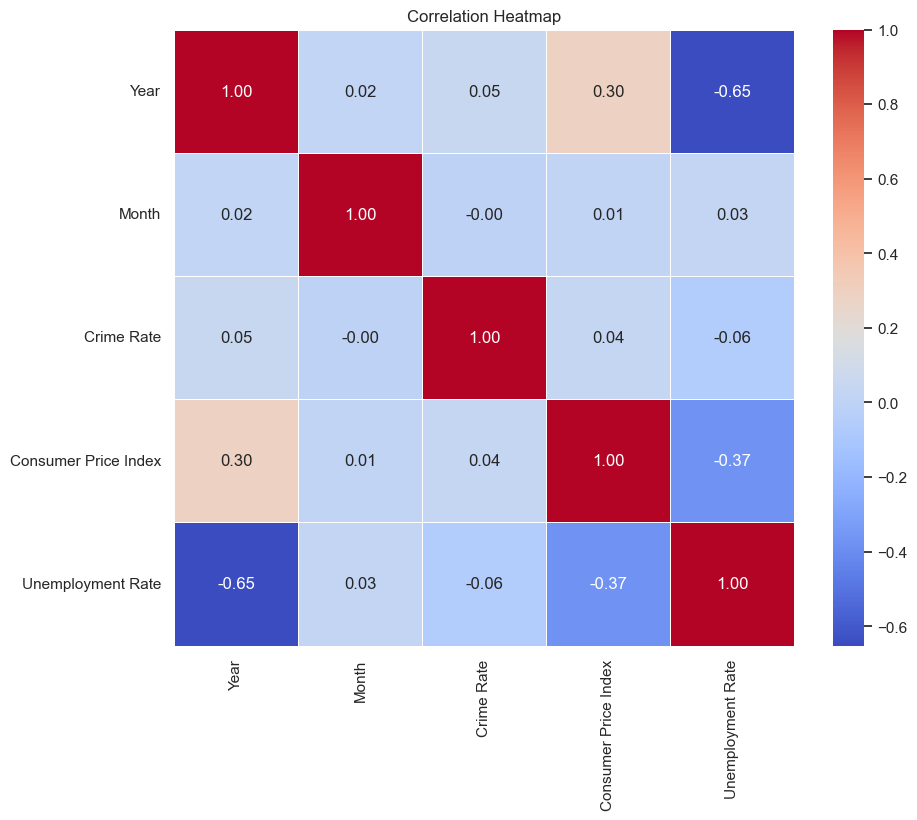

In [37]:
numeric_data = merged_data.drop(columns=['Crm Cd Desc'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [39]:
# Correlation analysis
cpi_crime_corr = merged_data['Consumer Price Index'].corr(merged_data['Crime Rate'])
lf_crime_corr = merged_data['Unemployment Rate'].corr(merged_data['Crime Rate'])

print(f"Correlation between Crime Rate and CPI: {cpi_crime_corr:.2f}")
print(f"Correlation between Crime Rate and Unemployment Rate: {lf_crime_corr:.2f}")


Correlation between Crime Rate and CPI: 0.04
Correlation between Crime Rate and Unemployment Rate: -0.06


### CORRELATION ANALYSIS

The correlation coefficients you provided indicate the strength and direction of the linear relationship between the variables.

**Correlation between Crime Rate and CPI (Consumer Price Index): 0.04**

Interpretation: 
    The correlation is close to zero (0.04), 
    suggesting a very weak positive linear relationship between Crime Rate and CPI. 
    In other words, there is little evidence of a direct linear connection between the two variables.

**Correlation between Crime Rate and Unemployment Rate is -0.06**

Interpretation: 
    The correlation is close to zero (-0.06), indicating a very weak negative linear relationship 
    between Crime Rate and Unemployment Rate. This suggests that there is little evidence of 
    a direct linear connection between Crime Rate and Unemployment Rate.

**Overall Analysis:**
    
The correlation coefficients are very close to zero in both cases, which implies a weak or no linear relationship between Crime Rate and the economic indicators (CPI and Unemployment Rate).

## TIME ANALYSIS

In [46]:
# Extract the day of the week and create a new column
df['Day of Week'] = df['DATE OCC'].dt.day_name()

# Extract the year from the 'DATE OCC' column
df['Year'] = df['DATE OCC'].dt.year

# Group the data by year and day of the week and calculate the crime count
crime_by_year_and_day = df.groupby(['Year', 'Day of Week'])['DR_NO'].count().reset_index()

print(crime_by_year_and_day)

    Year Day of Week  DR_NO
0   2020      Friday  29908
1   2020      Monday  28277
2   2020    Saturday  28916
3   2020      Sunday  27622
4   2020    Thursday  28247
5   2020     Tuesday  27593
6   2020   Wednesday  28978
7   2021      Friday  32292
8   2021      Monday  30288
9   2021    Saturday  30267
10  2021      Sunday  29359
11  2021    Thursday  29385
12  2021     Tuesday  28516
13  2021   Wednesday  29407
14  2022      Friday  36157
15  2022      Monday  32435
16  2022    Saturday  35222
17  2022      Sunday  32300
18  2022    Thursday  33153
19  2022     Tuesday  32270
20  2022   Wednesday  33070
21  2023      Friday  34857
22  2023      Monday  32081
23  2023    Saturday  33421
24  2023      Sunday  32459
25  2023    Thursday  32119
26  2023     Tuesday  31353
27  2023   Wednesday  32445
28  2024      Friday    899
29  2024      Monday   1118
30  2024    Saturday   1023
31  2024      Sunday    787
32  2024    Thursday    971
33  2024     Tuesday    979
34  2024   Wednesday

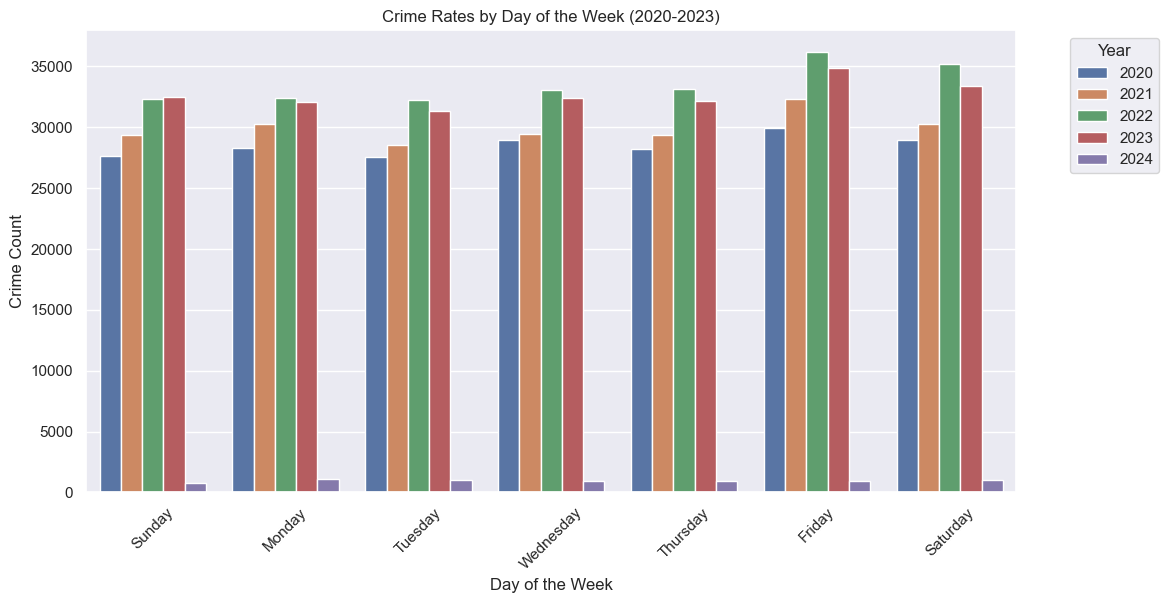

In [47]:
# Set the order of days of the week for plotting
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Create a bar plot for each year
plt.figure(figsize=(12, 6))
sns.barplot(x='Day of Week', y='DR_NO', data=crime_by_year_and_day, order=day_order, hue='Year')
plt.title('Crime Rates by Day of the Week (2020-2023)')
plt.xlabel('Day of the Week')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()


  Day of Week   DR_NO
0      Friday  134113
1      Monday  124199
2    Saturday  128849
3      Sunday  122527
4    Thursday  123875
5     Tuesday  120711
6   Wednesday  124832


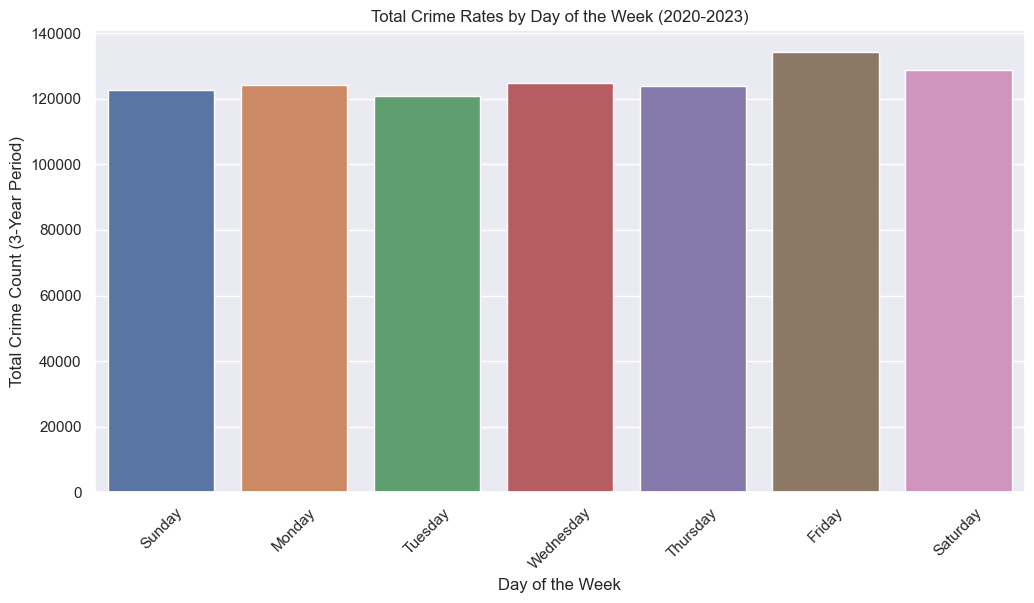

In [48]:
# Aggregate the data for the 3-year total
crime_total_by_day = crime_by_year_and_day.groupby('Day of Week')['DR_NO'].sum().reset_index()

# Print the total crime counts by day of the week
print(crime_total_by_day)

# Create a bar plot for the total crime rates over 3 years
plt.figure(figsize=(12, 6))
sns.barplot(x='Day of Week', y='DR_NO', data=crime_total_by_day, order=day_order)
plt.title('Total Crime Rates by Day of the Week (2020-2023)')
plt.xlabel('Day of the Week')
plt.ylabel('Total Crime Count (3-Year Period)')
plt.xticks(rotation=45)
plt.show()

### What is the evolution of crimes over the years?

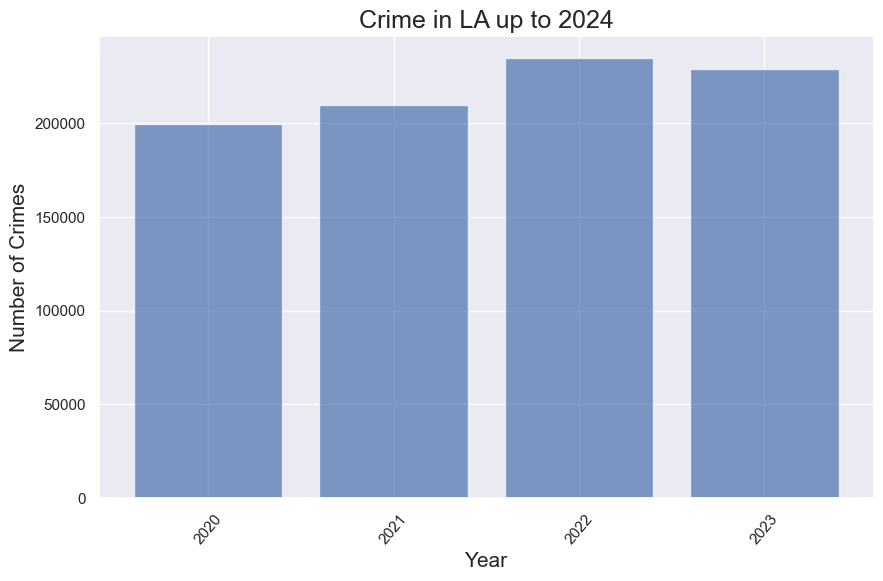

In [83]:
import matplotlib.pyplot as plt
mask_year = df['Year'] <= 2023
n_crime = df[mask_year]['Year'].value_counts().sort_index()  
# Creating the bar plot
plt.figure(figsize=(10, 6))  
plt.bar(n_crime.index, n_crime, alpha=0.7)  # Use the index for x-values
plt.xticks(n_crime.index, rotation=50)  # Use the index for x-tick labels
plt.xlabel('Year', size=15)
plt.ylabel('Number of Crimes', size=15)
plt.title('Crime in LA up to 2024', size=18) 
plt.show()


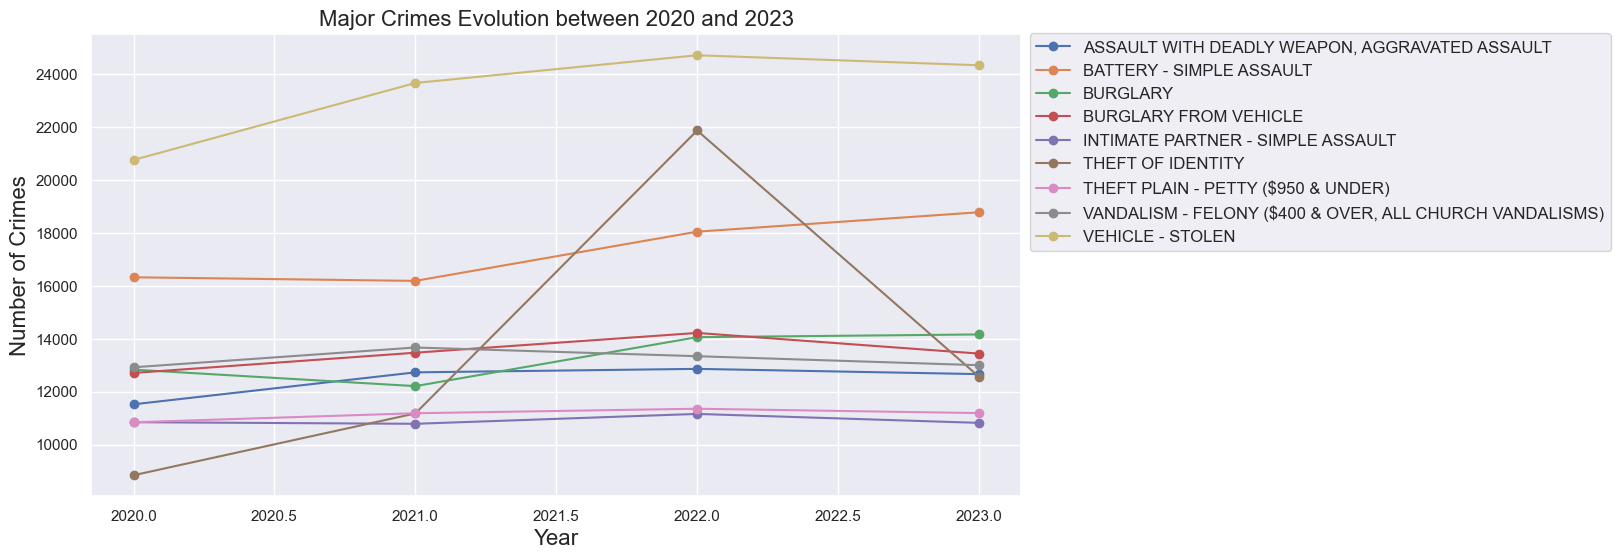

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and percent is your specified percentage
first_n = 5
percent = 0.6

# Get the top N crimes
top_n_crimes = df['Crm Cd Desc'].value_counts(1).index[:first_n]

# Calculate the cumulative percentage
cumulative_percent = df['Crm Cd Desc'].value_counts(1).cumsum()

# Filter the top crimes based on the specified percentage
top_crimes = cumulative_percent[cumulative_percent <= percent].index

# Filter the DataFrame for the top crimes
df_top_crimes = df[df['Crm Cd Desc'].isin(top_crimes)]

# Create a pivot table to count the number of crimes for each crime code and year
pivot_table = df_top_crimes.groupby(['Year', 'Crm Cd Desc'])['DR_NO'].count().unstack()

# Plot the major crimes evolution between 2020 and 2023
ax = pivot_table.loc[2020:2023, :].plot(figsize=(12, 6), marker='o')

# Set plot parameters
plt.legend(bbox_to_anchor=(1.0, 1.02), fontsize=12)
plt.title('Major Crimes Evolution between 2020 and 2023', fontsize=16)
plt.ylabel('Number of Crimes', fontsize=16)
plt.xlabel('Year', fontsize=16)

# Show the plot
plt.show()


### Is there any correlation between the crime rates and various demographic factors?

In [62]:
# Finding out the count of all genders from the dataset
gender_counts = df['Vict Sex'].value_counts()

# Print out the count of all genders
print("Count of All Genders:")
print(gender_counts)

Count of All Genders:
M    361373
F    322369
0    116302
X     78967
H        94
-         1
Name: Vict Sex, dtype: int64


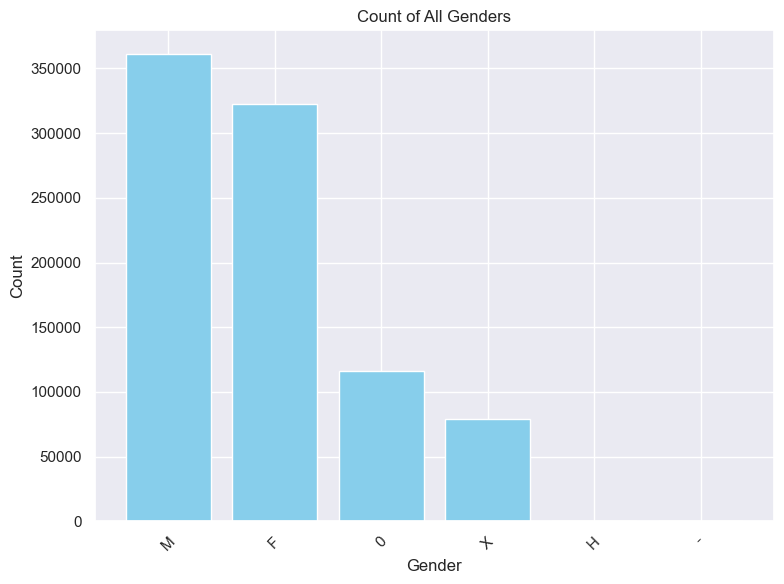

In [66]:
import matplotlib.pyplot as plt

# Convert values in 'Vict Sex' column to strings
df['Vict Sex'] = df['Vict Sex'].astype(str)

# Find out the count of all genders from the dataset
gender_counts = df['Vict Sex'].value_counts()

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Use a bar plot for visualization
plt.bar(gender_counts.index, gender_counts.values, color='skyblue')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of All Genders')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [67]:
# Finding out the count of all victim descents from the dataset
victim_descent_counts = df['Vict Descent'].value_counts()

# Print out the count of all victim descents
print("Count of All Victim Descents:")
print(victim_descent_counts)

Count of All Victim Descents:
H    268409
W    178256
B    124275
0    116310
X     87023
O     69500
A     19283
K      4754
F      3740
C      3468
J      1227
V       928
I       834
Z       445
P       235
U       175
D        73
G        64
L        57
S        48
-         2
Name: Vict Descent, dtype: int64


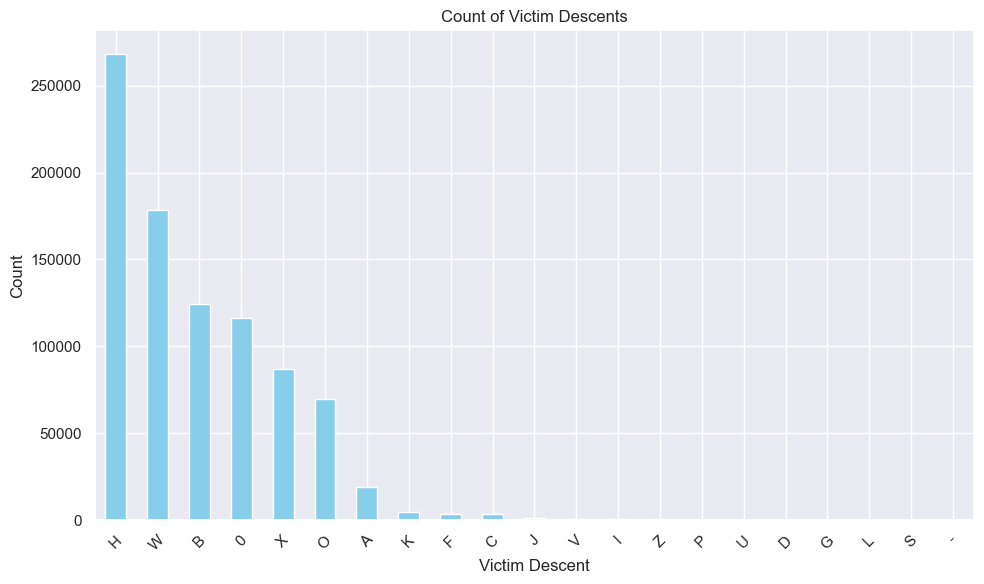

In [75]:
import matplotlib.pyplot as plt

# Find out the count of victim descents from the dataset
victim_descent_counts = df['Vict Descent'].value_counts()

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Use a bar plot for visualization
victim_descent_counts.plot(kind='bar', color='skyblue')

# Set labels and title
plt.xlabel('Victim Descent')
plt.ylabel('Count')
plt.title('Count of Victim Descents')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



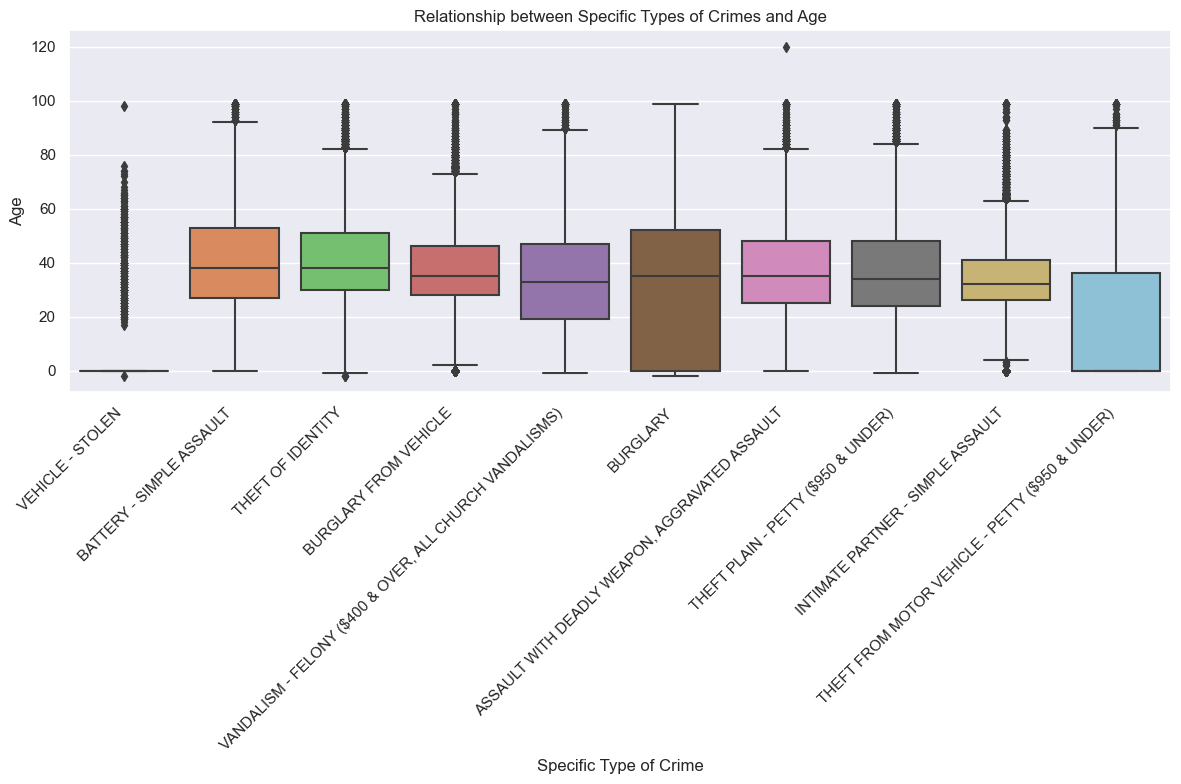

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

top_crimes = ['VEHICLE - STOLEN', 'BATTERY - SIMPLE ASSAULT', 'THEFT OF IDENTITY', 
              'BURGLARY FROM VEHICLE', 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
              'BURGLARY', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 
              'THEFT PLAIN - PETTY ($950 & UNDER)', 'INTIMATE PARTNER - SIMPLE ASSAULT',
              'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)']

filtered_df = df[df['Crm Cd Desc'].isin(top_crimes)]

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Use a boxplot for visualization
sns.boxplot(x='Crm Cd Desc', y='Vict Age', data=filtered_df, order=top_crimes, palette='muted')
plt.xticks(rotation=45, ha='right')  
plt.title('Relationship between Specific Types of Crimes and Age')
plt.xlabel('Specific Type of Crime')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


<Figure size 2000x1400 with 0 Axes>

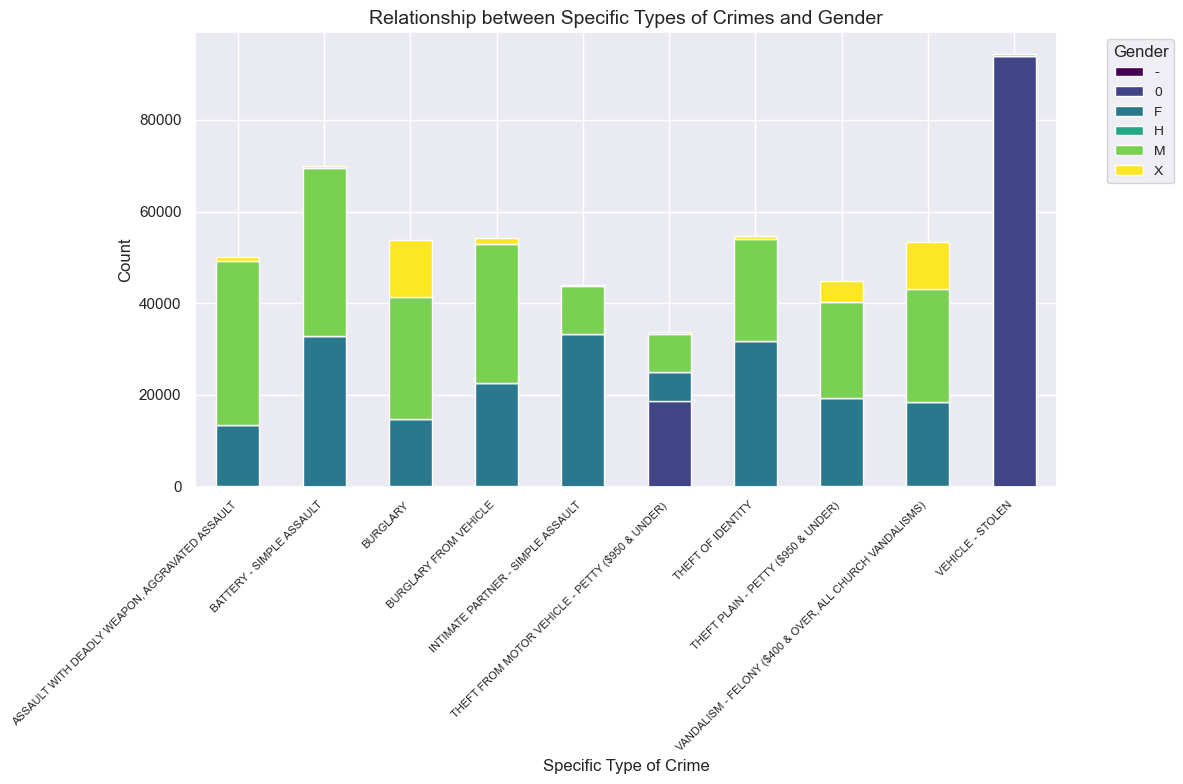

In [77]:
import matplotlib.pyplot as plt

top_crimes = ['VEHICLE - STOLEN', 'BATTERY - SIMPLE ASSAULT', 'THEFT OF IDENTITY', 
              'BURGLARY FROM VEHICLE', 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
              'BURGLARY', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 
              'THEFT PLAIN - PETTY ($950 & UNDER)', 'INTIMATE PARTNER - SIMPLE ASSAULT',
              'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)']

filtered_df = df[df['Crm Cd Desc'].isin(top_crimes)]

gender_counts = filtered_df.groupby(['Crm Cd Desc', 'Vict Sex'])['Crm Cd Desc'].count().unstack().fillna(0)

plt.figure(figsize=(20, 14))  
ax = gender_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.xticks(rotation=45, ha='right', fontsize=8)  
plt.title('Relationship between Specific Types of Crimes and Gender', fontsize=14)
plt.xlabel('Specific Type of Crime', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Move the legend outside the plot to avoid overlapping
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

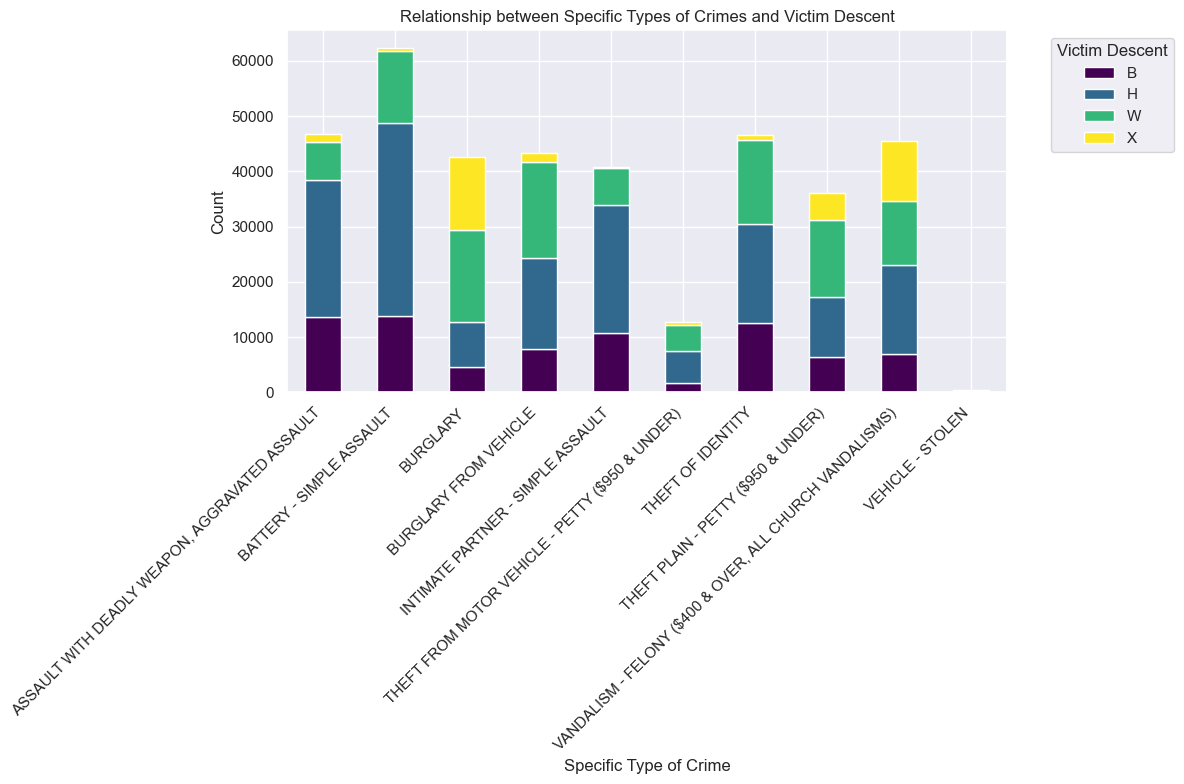

In [78]:
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(15, 8))

# Create a stacked bar plot
crime_by_descent.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Relationship between Specific Types of Crimes and Victim Descent')
plt.xlabel('Specific Type of Crime')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Victim Descent', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

<Figure size 1600x1000 with 0 Axes>

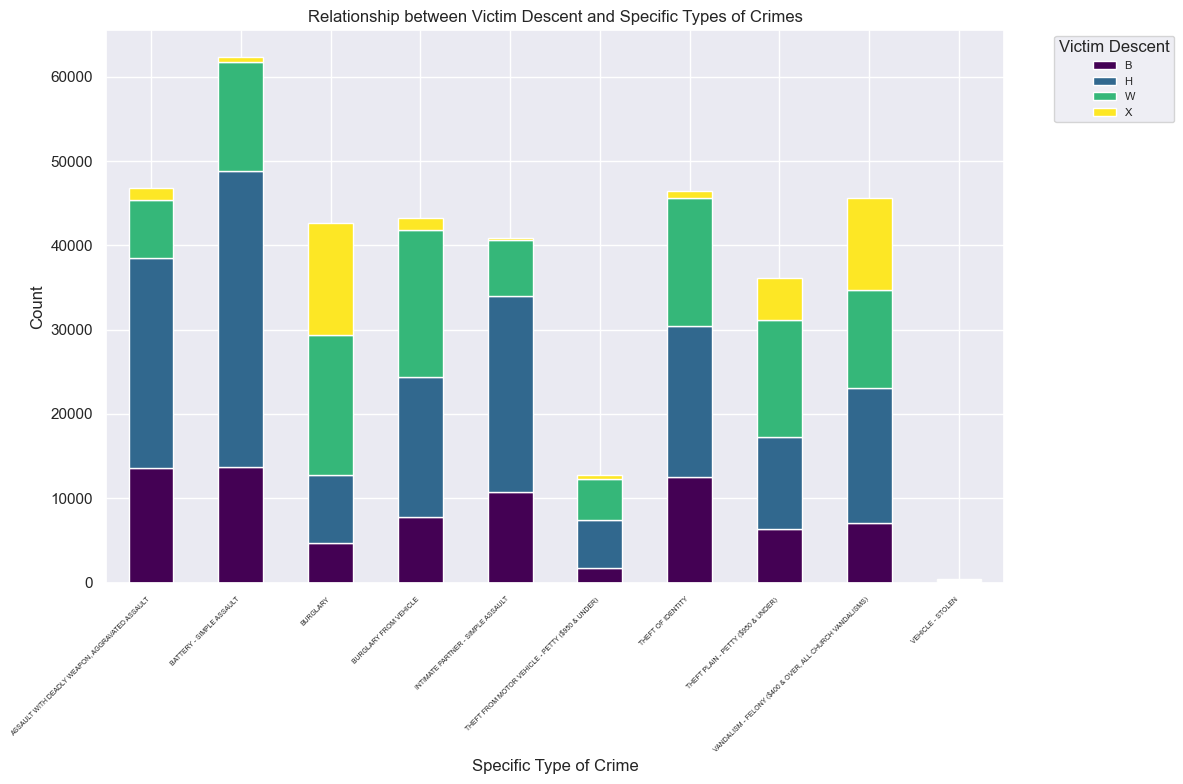

In [74]:
#Visualizing the relationship between 4 DESCENTs with the most people and TEN MOST SPECIFIC CRIMES

import matplotlib.pyplot as plt



# Set the size of the plot
plt.figure(figsize=(16, 10))  


crime_by_descent.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Specific Type of Crime')
plt.ylabel('Count')
plt.title('Relationship between Victim Descent and Specific Types of Crimes')
plt.xticks(rotation=45, ha='right', fontsize=5)  


plt.legend(title='Victim Descent', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

## PREDICTING FUTURE TRENDS

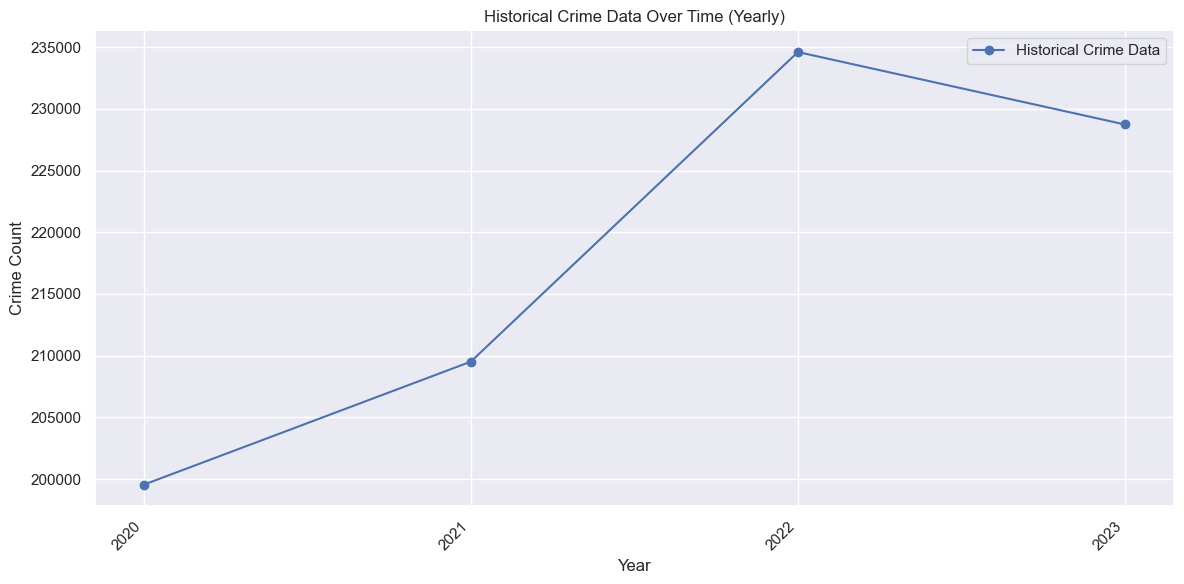

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for years up to 2023
df_filtered = df[pd.to_datetime(df['DATE OCC']).dt.year <= 2023]

# Group by yearly periods and count the occurrences
crime_count_yearly = df_filtered.groupby(pd.to_datetime(df_filtered['DATE OCC']).dt.to_period('Y')).size().reset_index(name='Crime Count')

# Set 'DATE OCC' as the index
crime_count_yearly.set_index('DATE OCC', inplace=True)

# Plot Historical Crime Data (yearly)
plt.figure(figsize=(12, 6))
plt.plot(crime_count_yearly.index.astype(str), crime_count_yearly['Crime Count'], label='Historical Crime Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.title('Historical Crime Data Over Time (Yearly)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend()
plt.tight_layout()
plt.show()


/Users/krithikaannaswamykannan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


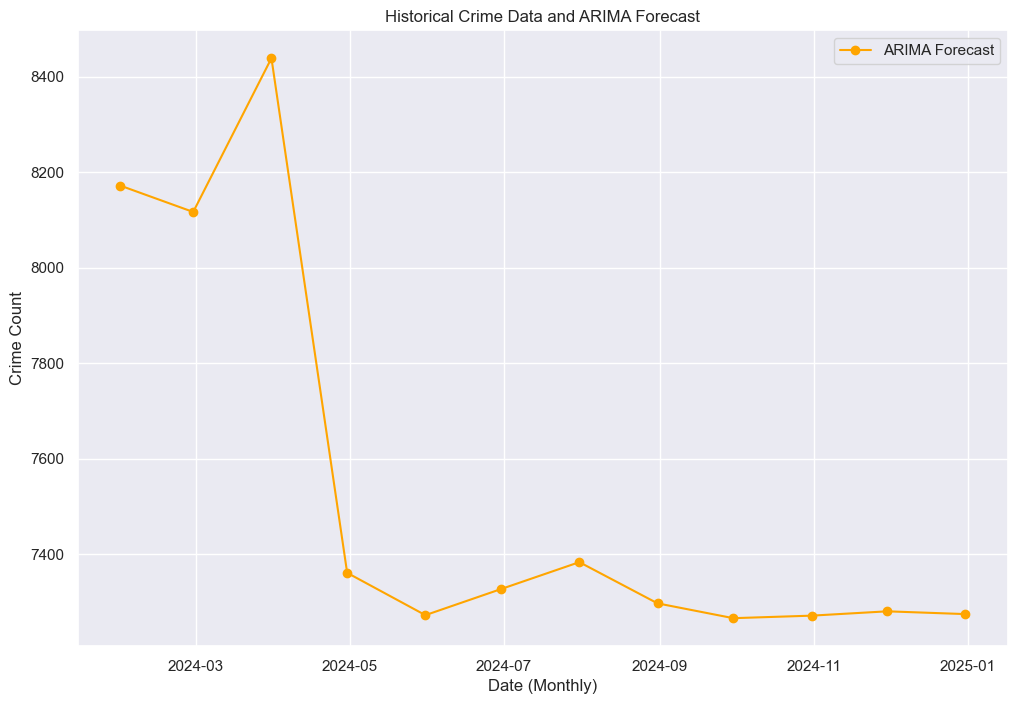

In [86]:
from statsmodels.tsa.arima.model import ARIMA

crime_count = df.groupby(pd.to_datetime(df['DATE OCC']).dt.to_period('M')).size().reset_index(name='Crime Count')

# Set 'DATE OCC' as the index
crime_count.set_index('DATE OCC', inplace=True)

# ARIMA Model
arima_model = ARIMA(crime_count['Crime Count'], order=(5,1,0))  # Example order, tune this based on your data
arima_result = arima_model.fit()
arima_forecast = arima_result.predict(start=len(crime_count), end=len(crime_count) + 11, typ='levels')  # Forecast 1 year ahead

# Plot ARIMA Forecast (monthly)
forecast_index = pd.date_range(start=crime_count.index[-1].to_timestamp(), periods=12, freq='M')
plt.plot(forecast_index, arima_forecast, label='ARIMA Forecast', color='orange', marker='o')

plt.xlabel('Date (Monthly)')
plt.ylabel('Crime Count')
plt.title('Historical Crime Data and ARIMA Forecast')
plt.legend()
plt.grid(True)
plt.show()